In [117]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import lightgbm as lgb
from math import sqrt
from sklearn.model_selection import KFold
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

plt.rcParams['figure.figsize'] = [16, 10]

In [118]:
df = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

df.head(1)

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.2075,16.773757,0.933841,0.000846,0.00549,0.000676,0.0,0.001372,...,0.002848,0.007537,0.0,0.012928,0,0,ZA4161001,-29.68227,24.734743,0.292039


In [119]:
df['houdivind']=df['total_households']/df['total_individuals']*100
df_test['houdivind']=df_test['total_households']/df_test['total_individuals']*100
df_full=pd.concat([df,df_test])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


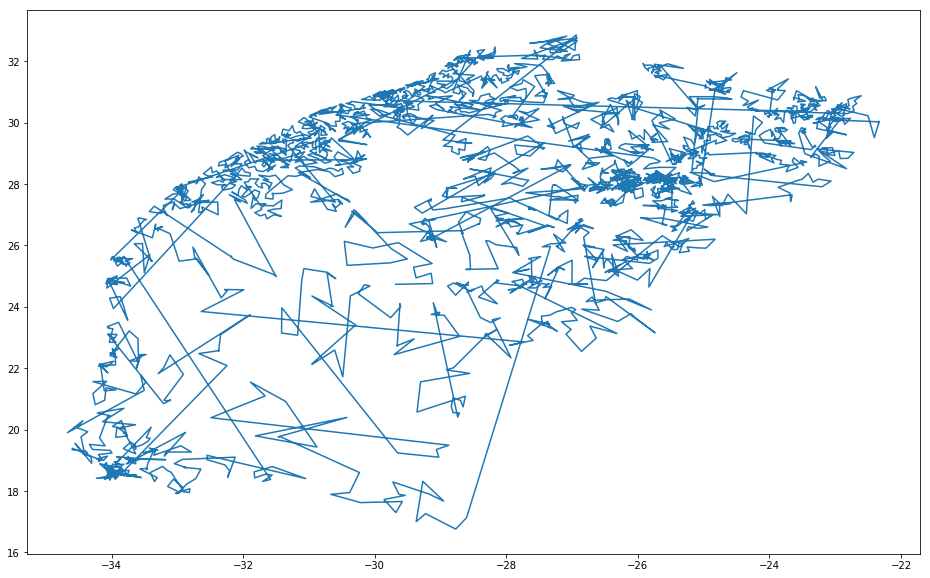

In [120]:
x1=df_full['lon']
x2=df_full['lat']
plt.plot(x2,x1)

In [121]:
# Variable with the Longitude and Latitude
X=df_full.loc[:,['lat','lon']]
X.head(10)

,lat,lon
0,-29.682270,24.734743
1,-29.119311,24.757737
2,-29.142276,25.094093
3,-29.372052,24.942867
4,-29.409381,25.290165
5,-29.126870,25.410360
6,-29.640860,26.091774
7,-30.029163,25.917164
8,-30.462176,26.133170
9,-30.420421,25.351630


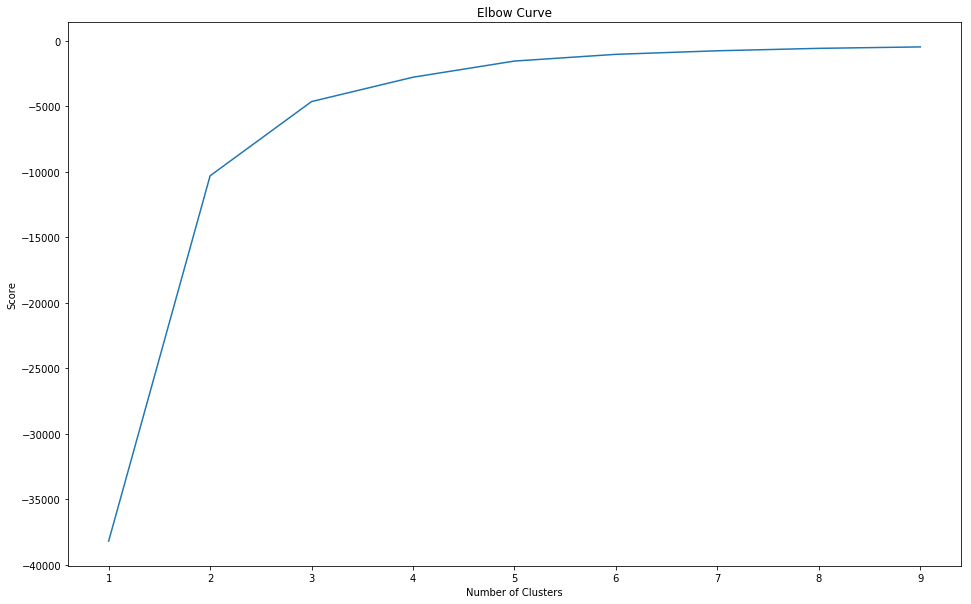

In [122]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_full[['lat']]
X_axis = df_full[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [123]:
kmeans = KMeans(n_clusters = 3, init ='k-means++', max_iter=5000)
kmeans.fit(X[X.columns[0:2]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[0:2]]) # Labels of each point
print(labels)


[0 0 0 ... 1 1 1]


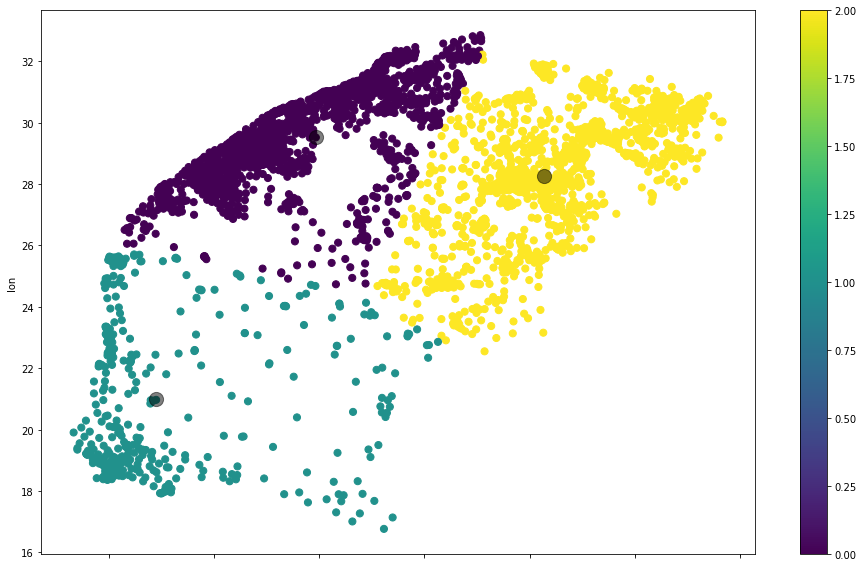

In [124]:
X.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
#print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [125]:
X

,lat,lon,cluster_label
0,-29.682270,24.734743,0
1,-29.119311,24.757737,0
2,-29.142276,25.094093,0
3,-29.372052,24.942867,0
4,-29.409381,25.290165,0
5,-29.126870,25.410360,0
6,-29.640860,26.091774,0
7,-30.029163,25.917164,0
8,-30.462176,26.133170,0
9,-30.420421,25.351630,0


In [126]:
df_full["cluster"] = X["cluster_label"]

In [127]:
#df_full['cluster']=X['cluster_label']
df_full.to_csv("kmean_data")

###  Split Data

In [128]:
train_new=df_full.iloc[0:len(df),]
test_new=df_full.iloc[len(df):,]


## Subsetting Data to X and y 

In [137]:
X = train_new[['lln_00', 'lan_06', 'psa_04', 'lan_03', 'lan_07', 'psa_01',
       'lan_09', 'dw_01', 'lan_05', 'NL', 'lln_01', 'pg_00', 'lan_11',
       'lan_10', 'car_00', 'car_01', 'pw_00', 'psa_00','houdivind']]

y= train_new["target"]

Xtest= test_new[['lln_00', 'lan_06', 'psa_04', 'lan_03', 'lan_07', 'psa_01',
       'lan_09', 'dw_01', 'lan_05', 'NL', 'lln_01', 'pg_00', 'lan_11',
       'lan_10', 'car_00', 'car_01', 'pw_00', 'psa_00','houdivind']]

### Train_Test and Split data

In [138]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234)

###  Random Forest Regressor

In [139]:


rf = RandomForestRegressor(n_estimators=300, min_samples_split=2, max_features= 6,
                           min_samples_leaf=2,max_depth=20, bootstrap= False)
rf.fit(X_train, y_train)




RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [147]:
predictions= rf.predict(X_test)
print("RMSE:", sqrt(mean_squared_error(y_test, predictions)))

df_test["new_preds"]=rf.predict(Xtest)

create_submission(df_test, 'random_forestonly.csv', cols=top_cols_20, models=[rf])

RMSE: 3.290418306435219


,ward,target
0,21001001: Ward 1,17.822340
1,21001002: Ward 2,15.604058
2,21001003: Ward 3,21.403763
3,21001004: Ward 4,16.672598
4,21001005: Ward 5,20.277923
5,21001006: Ward 6,23.224002
6,21001007: Ward 7,13.896123
7,21002001: Ward 1,18.233312
8,21002002: Ward 2,18.503962
9,21002003: Ward 3,23.385927


## Save to CSV

In [141]:
df_test[['ward',"new_preds"]].to_csv('new_predictions.csv', index=False)

## XGBOOST REGRESSOR MODEL

In [149]:
model_xgb = XGBRegressor(n_estimators=1000,learning_rate=0.05, min_child_weight=2,max_depth=20,
                         eta =0.6, reg_lambda = 1.3, subsample= 0.8)

model_xgb.fit(X_train, y_train)
print("the rmse for xgboost is",sqrt(mean_squared_error(y_test, model_xgb.predict(X_test)))
)
df_test[['ward',"new_preds"]].to_csv('model_xgbostonly.csv', index=False)

/home/aims/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:16:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the rmse for xgboost is 3.328533128538366


## Save Xgboost to CSV

In [143]:
df_test["new_preds"]=model_xgb.predict(Xtest)

## Combined xgboost and random forest


In [146]:
avg_pre = (model_xgb.predict(X_test) + rf.predict(X_test))/2
print("the rmse for the two models is ",sqrt(mean_squared_error(y_test, avg_pre))
)

top_cols_20 = ['lln_00', 'lan_06', 'psa_04', 'lan_03', 'lan_07', 'psa_01',
       'lan_09', 'dw_01', 'lan_05', 'NL', 'lln_01', 'pg_00', 'lan_11',
       'lan_10', 'car_00', 'car_01', 'pw_00', 'psa_00','houdivind']
       
       
create_submission(df_test, 'random_and_xgboost.csv', cols=top_cols_20, models=[rf, model_xgb])

the rmse for the two models is  3.2471294536629363


,ward,target
0,21001001: Ward 1,17.525664
1,21001002: Ward 2,14.997891
2,21001003: Ward 3,19.287876
3,21001004: Ward 4,16.232177
4,21001005: Ward 5,18.828403
5,21001006: Ward 6,22.297188
6,21001007: Ward 7,13.343147
7,21002001: Ward 1,18.104119
8,21002002: Ward 2,18.715256
9,21002003: Ward 3,23.315934


## Function for submission

In [ ]:
def create_submission(data, fname, cols, models=[]):
    score = 0
    for model in models:
        score += model.predict(data[cols])
    data['target'] = (score / len(models))
    submissions = data[['ward', 'target']]
    submissions.to_csv(fname, index=False)
    return submissions

## Parameter tunning for xgboost

In [53]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     StratifiedKFold)

In [54]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=3, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        
         pred = fitted_model.predict_proba(X_test_data)
    else:
          pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [55]:
 model = XGBRegressor()
param_grid = {
   'n_estimators': [400, 700, 1000],
     'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
 }

 model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

 print(np.sqrt(-model.best_score_))
 print(model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   43.9s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed: 10.1min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed: 18.2min
[Parallel(n_jobs=3)]: Done 1007 tasks      | elapsed: 29.8min
[Parallel(n_jobs=3)]: Done 1452 tasks      | elapsed: 43.9min
[Parallel(n_jobs=3)]: Done 1979 tasks      | elapsed: 61.6min
[Parallel(n_jobs=3)]: Done 2430 out of 2430 | elapsed: 73.2min finished
/home/aims/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:02:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3.5424478675603726
{'colsample_bytree': 0.7, 'max_depth': 20, 'n_estimators': 1000, 'reg_alpha': 1.2, 'reg_lambda': 1.3, 'subsample': 0.8}


In [60]:
model = RandomForestRegressor()
param_grid = {
   'n_estimators': [300, 700, 1000],
    'max_depth': [10,20,100],
    'min_samples_split': [2,4,6],
    'max_features': [2,4,6],
    'min_samples_leaf': [2,3,5]
 }

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   14.2s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:  3.8min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:  6.6min
[Parallel(n_jobs=3)]: Done 1007 tasks      | elapsed: 10.7min
[Parallel(n_jobs=3)]: Done 1215 out of 1215 | elapsed: 13.6min finished


3.648040133555185
{'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
